# Bangalore_RealEstate_PricePred

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
for col in df.columns:
    print(col,"  ",df[col].isnull().sum(),"  ",100*(df[col].isnull().mean()),"%")

area_type    0    0.0 %
availability    0    0.0 %
location    1    0.0075075075075075074 %
size    16    0.12012012012012012 %
society    5502    41.306306306306304 %
total_sqft    0    0.0 %
bath    73    0.5480480480480481 %
balcony    609    4.572072072072072 %
price    0    0.0 %


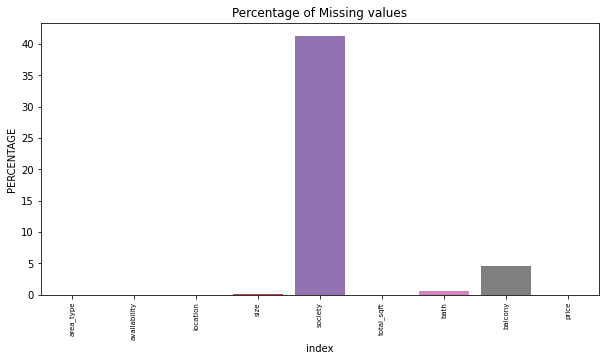

In [5]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(10,5))
ax = sns.barplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

- society has more than 40% missing values
- balcony has almost 5 % missing values

## DATA CLEANING

In [6]:
## Society has more than 40% null. Lets see how many labels are there.
(df['society'].value_counts())

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
AaineSi     1
Saarep      1
Aavelis     1
Ocuil T     1
Vemit S     1
Name: society, Length: 2688, dtype: int64

In [7]:
len(df['society'].value_counts())

2688

- These are society names or building names which probably do not help much in prediction
- So I am dropping the society column

In [8]:
df.drop(['society'],inplace=True,axis=1)

In [9]:
## Availability
df['availability'].value_counts().head(10)

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
19-Dec             185
18-Jul             143
18-Mar             131
18-Jun              99
20-Dec              98
Name: availability, dtype: int64

- lets break it down to only Ready to Move and Not Ready to Move

In [10]:
df['availability'] = np.where(df['availability']=='Ready To Move','Ready To Move','Not Ready To Move')
df['availability'].value_counts()

Ready To Move        10581
Not Ready To Move     2739
Name: availability, dtype: int64

In [11]:
## Lets now check out balcony and bath
(df['balcony'].value_counts())

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [12]:
df['balcony'].fillna(df['balcony'].median(),inplace=True)
df['bath'].fillna(df['bath'].median(),inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready To Move,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


- Now my data is devoid of any null values
- lets now clean the categorical variables

In [15]:
# 1. area_type
df['area_type'].value_counts()

Super built-up  Area    8789
Built-up  Area          2418
Plot  Area              2009
Carpet  Area              87
Name: area_type, dtype: int64

In [16]:
df_area_type = pd.get_dummies(df['area_type'])
df_area_type.drop(['Carpet  Area'],inplace=True,axis=1)

In [17]:
df = pd.concat([df,df_area_type],axis=1)
df.drop(['area_type'],axis=1,inplace=True)

In [18]:
df

,availability,location,size,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area
0,Not Ready To Move,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,1
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,1,0
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,1
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,1,0,0
13316,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00,0,0,1
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,1,0,0
13318,Not Ready To Move,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,0,0,1


In [19]:
## Lets look at availability now

dict = {'Ready To Move':1,
       'Not Ready To Move':0}
df['availability'] = df['availability'].map(dict)

In [20]:
df

,availability,location,size,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area
0,0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,1
1,1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,1,0
2,1,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0
3,1,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,1
4,1,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13315,1,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,1,0,0
13316,1,Richards Town,4 BHK,3600,5.0,2.0,400.00,0,0,1
13317,1,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,1,0,0
13318,0,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,0,0,1


In [21]:
## Lets explore size
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df['bhk'] = pd.DataFrame

In [23]:
for i in range(0,len(df['size'])):
    #print(df['size'].iloc[i])
    df['bhk'].iloc[i] = float(df['size'].iloc[i].split()[0])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
df.drop(['size'],axis=1,inplace=True)

In [25]:
df

,availability,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,bhk
0,0,Electronic City Phase II,1056,2.0,1.0,39.07,0,0,1,2
1,1,Chikka Tirupathi,2600,5.0,3.0,120.00,0,1,0,4
2,1,Uttarahalli,1440,2.0,3.0,62.00,1,0,0,3
3,1,Lingadheeranahalli,1521,3.0,1.0,95.00,0,0,1,3
4,1,Kothanur,1200,2.0,1.0,51.00,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
13315,1,Whitefield,3453,4.0,0.0,231.00,1,0,0,5
13316,1,Richards Town,3600,5.0,2.0,400.00,0,0,1,4
13317,1,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,1,0,0,2
13318,0,Padmanabhanagar,4689,4.0,1.0,488.00,0,0,1,4


In [26]:
## Lets see total_sqft
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

- Now in this in some observations I have ranges.
- So first I detect how many of the observations are not in ranges ie how mant are float

In [27]:
def is_float(x):
    try:
        x = float(x)
    except:
        return False
    return True

In [28]:
df[~df['total_sqft'].apply(is_float)].head(10)

,availability,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,bhk
30,0,Yelahanka,2100 - 2850,4.0,0.0,186.000,0,0,1,4
56,0,Devanahalli,3010 - 3410,2.0,2.0,192.000,1,0,0,4
81,0,Hennur Road,2957 - 3450,2.0,2.0,224.500,1,0,0,4
122,0,Hebbal,3067 - 8156,4.0,0.0,477.000,0,0,1,4
137,0,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,0,0,1,2
165,0,Sarjapur,1145 - 1340,2.0,0.0,43.490,0,0,1,2
188,1,KR Puram,1015 - 1540,2.0,0.0,56.800,0,0,1,2
224,0,Devanahalli,1520 - 1740,2.0,2.0,74.820,0,0,1,3
410,1,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,0,0,1,1
549,0,Hennur Road,1195 - 1440,2.0,0.0,63.770,0,0,1,2


In [29]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [30]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.dropna(inplace=True)

In [31]:
df

,availability,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,bhk
0,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,1,2
1,1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,1,0,4
2,1,Uttarahalli,1440.0,2.0,3.0,62.00,1,0,0,3
3,1,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,1,3
4,1,Kothanur,1200.0,2.0,1.0,51.00,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
13315,1,Whitefield,3453.0,4.0,0.0,231.00,1,0,0,5
13316,1,Richards Town,3600.0,5.0,2.0,400.00,0,0,1,4
13317,1,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,1,0,0,2
13318,0,Padmanabhanagar,4689.0,4.0,1.0,488.00,0,0,1,4


In [32]:
## Lets create a new column Price Per sqft
## This will help in outlier detection later
df['price_per_sqft'] = 100000*df['price']/df['total_sqft']
df.head()

,availability,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,bhk,price_per_sqft
0,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,1,2,3699.810606
1,1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,1,0,4,4615.384615
2,1,Uttarahalli,1440.0,2.0,3.0,62.00,1,0,0,3,4305.555556
3,1,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,1,3,6245.890861
4,1,Kothanur,1200.0,2.0,1.0,51.00,0,0,1,2,4250.000000


In [33]:
## Lets explore Location column
len(df['location'].unique())

1298

In [34]:
df['location'] = df['location'].apply(lambda x: x.strip())

In [35]:
len(df['location'].unique())

1287

In [36]:
loc_stats = df['location'].value_counts(ascending=False)
loc_stats

Whitefield             538
Sarjapur  Road         397
Electronic City        304
Kanakpura Road         271
Thanisandra            236
                      ... 
Banaswadi,               1
Veerabhadra Nagar        1
Mullur                   1
6th Block Jayanagar      1
1Channasandra            1
Name: location, Length: 1287, dtype: int64

In [37]:
## Any location with less than 10 records, lets tag them by others
loc_stats_less_than_10 = (loc_stats[loc_stats<=10])
loc_stats_less_than_10

Sadashiva Nagar          10
Thyagaraja Nagar         10
1st Block Koramangala    10
Nagadevanahalli          10
Dodsworth Layout         10
                         ..
Banaswadi,                1
Veerabhadra Nagar         1
Mullur                    1
6th Block Jayanagar       1
1Channasandra             1
Name: location, Length: 1047, dtype: int64

In [38]:
df['location'] = df['location'].apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)
len(df['location'].unique())

241

In [39]:
df

,availability,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,bhk,price_per_sqft
0,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,1,2,3699.810606
1,1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,1,0,4,4615.384615
2,1,Uttarahalli,1440.0,2.0,3.0,62.00,1,0,0,3,4305.555556
3,1,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,1,3,6245.890861
4,1,Kothanur,1200.0,2.0,1.0,51.00,0,0,1,2,4250.000000
...,...,...,...,...,...,...,...,...,...,...,...
13315,1,Whitefield,3453.0,4.0,0.0,231.00,1,0,0,5,6689.834926
13316,1,other,3600.0,5.0,2.0,400.00,0,0,1,4,11111.111111
13317,1,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,1,0,0,2,5258.545136
13318,0,Padmanabhanagar,4689.0,4.0,1.0,488.00,0,0,1,4,10407.336319


## Outlier Detection

In [40]:
## Lets assume each room must have a threshold of 300 sq ft
df1 = df[df['total_sqft']/df['bhk']<300]
df1

,availability,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,bhk,price_per_sqft
9,1,other,1020.0,6.0,2.0,370.0,0,1,0,6,36274.509804
45,1,HSR Layout,600.0,9.0,2.0,200.0,0,1,0,8,33333.333333
58,1,Murugeshpalya,1407.0,4.0,1.0,150.0,0,1,0,6,10660.980810
68,1,Devarachikkanahalli,1350.0,7.0,0.0,85.0,0,1,0,8,6296.296296
70,1,other,500.0,3.0,2.0,100.0,0,1,0,3,20000.000000
...,...,...,...,...,...,...,...,...,...,...,...
13277,1,other,1400.0,7.0,2.0,218.0,0,1,0,7,15571.428571
13279,1,other,1200.0,5.0,2.0,130.0,0,1,0,6,10833.333333
13281,1,Margondanahalli,1375.0,5.0,1.0,125.0,0,1,0,5,9090.909091
13303,1,Vidyaranyapura,774.0,5.0,3.0,70.0,0,1,0,5,9043.927649


- These are my outliers

In [41]:
df = df[~(df['total_sqft']/df['bhk']<300)]

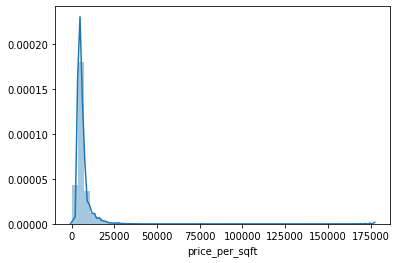

In [42]:
# Remove outliers in price per sqft
sns.distplot(df['price_per_sqft'])

In [43]:
## Lets filter out the outliers based on price per sqft based on a particular location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(m-st)) & (subdf['price_per_sqft']<(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

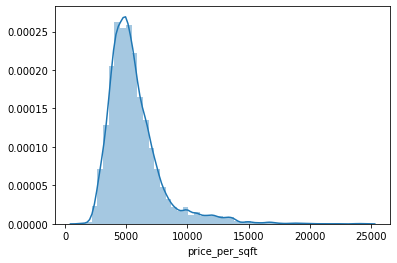

In [44]:
df = remove_pps_outliers(df)
sns.distplot(df['price_per_sqft'])

In [45]:
## Let us also check whether for any given location, cost of 2bhk>3bhk
def scatter_plot(df,loc):
    bhk2 = df[(df['location'] == loc) & (df.bhk==2)]
    bhk3 = df[(df['location'] == loc) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color = 'blue',label='2 BHK')
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker = '+', color = 'green',label='3 BHK')
    plt.xlabel("Total SQFT Area")
    plt.ylabel("Price Per SQFT")
    plt.title(loc)
    plt.legend()

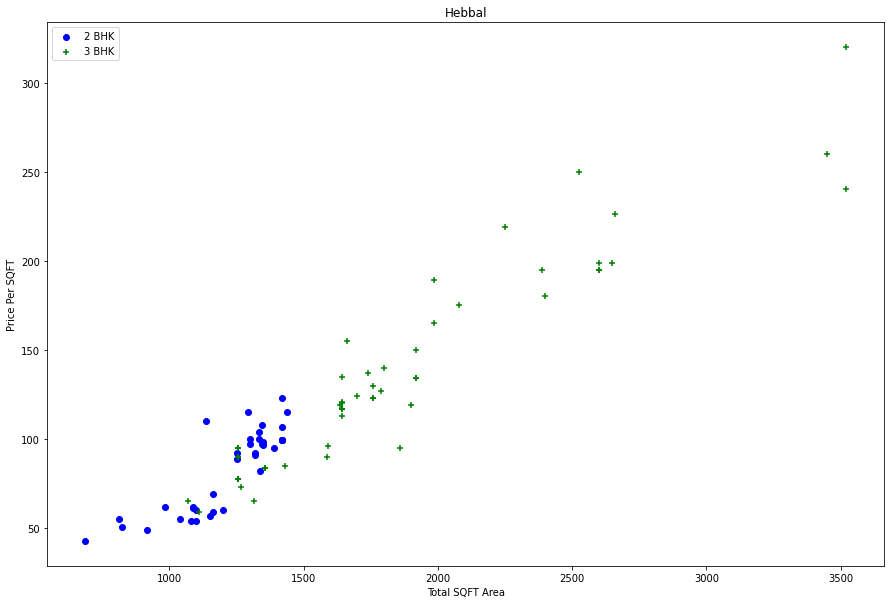

In [46]:
scatter_plot(df,'Hebbal')

- For one particular location there are some 2bhk which have more selling price than 3 bhk. So lets remove them

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')         

In [48]:
df = remove_bhk_outliers(df)

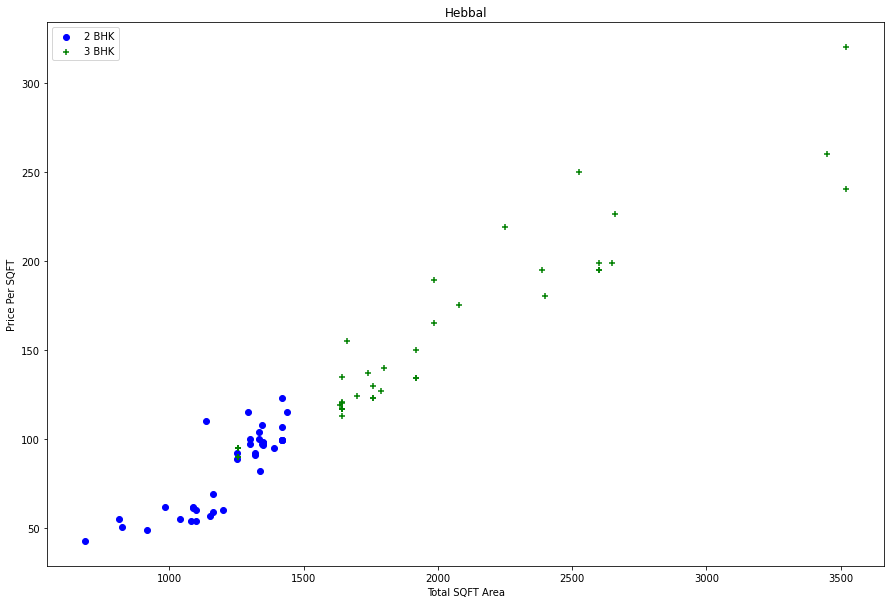

In [49]:
scatter_plot(df,'Hebbal')

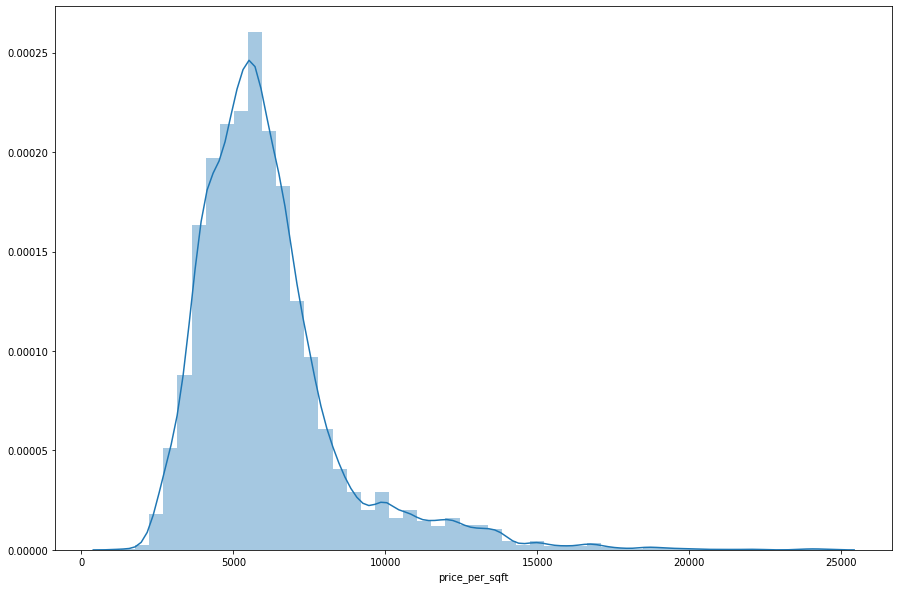

In [50]:
sns.distplot(df['price_per_sqft'])

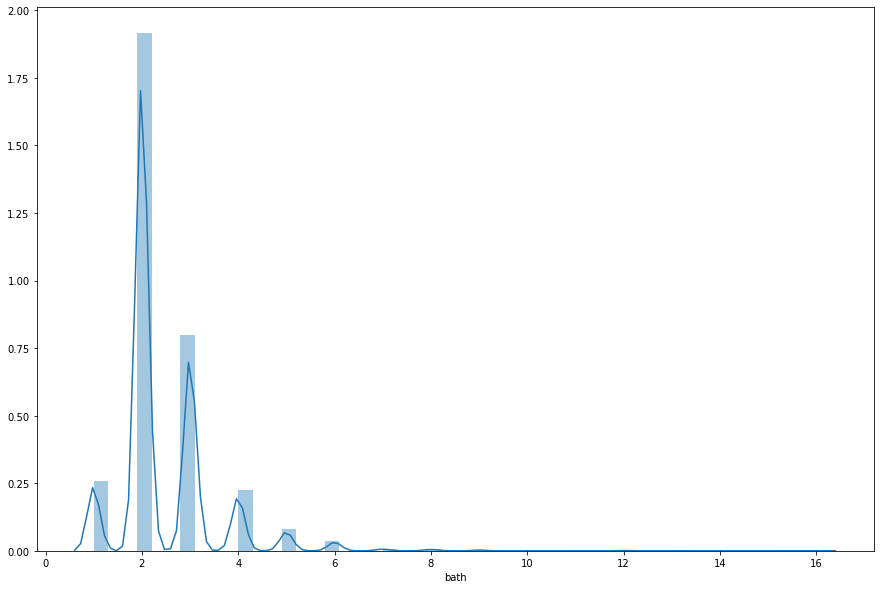

In [51]:
## Lets check the outliers for bathrooms
df['bath'].unique()
sns.distplot(df['bath'])

- Obviously there are outliers 

In [52]:
## Anytime the num of bathrooms > num bedrooms I will remove those observations
df[df['bath']<=df['bhk']]

,availability,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,bhk,price_per_sqft
0,0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,0,0,1,4,15017.543860
1,0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,0,0,1,3,11901.840491
2,1,1st Block Jayanagar,1875.0,2.0,3.0,235.0,0,0,1,3,12533.333333
3,0,1st Block Jayanagar,1200.0,2.0,0.0,130.0,1,0,0,3,10833.333333
4,0,1st Block Jayanagar,1235.0,2.0,2.0,148.0,0,0,1,2,11983.805668
...,...,...,...,...,...,...,...,...,...,...,...
10277,1,other,1155.0,2.0,1.0,64.0,0,0,1,2,5541.125541
10279,0,other,1200.0,2.0,3.0,70.0,0,0,0,2,5833.333333
10280,1,other,1800.0,1.0,1.0,200.0,0,0,1,1,11111.111111
10283,1,other,1353.0,2.0,2.0,110.0,0,0,1,2,8130.081301


In [53]:
## price_per_sqft was created by me for outlier detection. So now i will drop this feature
df.drop(['price_per_sqft'],axis='columns',inplace=True)

In [54]:
dummies = pd.get_dummies(df['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head(3)

,availability,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,bhk,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
1,0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
2,1,1st Block Jayanagar,1875.0,2.0,3.0,235.0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df = df.drop('location',axis='columns')
df.head()

,availability,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,bhk,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,2850.0,4.0,1.0,428.0,0,0,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1630.0,3.0,2.0,194.0,0,0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1875.0,2.0,3.0,235.0,0,0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1200.0,2.0,0.0,130.0,1,0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1235.0,2.0,2.0,148.0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df.shape

(7342, 249)

## Model Building

In [58]:
X = df.drop('price',axis='columns')
y = df['price']

In [59]:
X

,availability,total_sqft,bath,balcony,Built-up Area,Plot Area,Super built-up Area,bhk,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,2850.0,4.0,1.0,0,0,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1630.0,3.0,2.0,0,0,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1875.0,2.0,3.0,0,0,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1200.0,2.0,0.0,1,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1235.0,2.0,2.0,0,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,0,1200.0,2.0,3.0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
10280,1,1800.0,1.0,1.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10283,1,1353.0,2.0,2.0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
10284,0,812.0,1.0,0.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state=0)

In [61]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8278655824336222

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82786558, 0.87672229, 0.88940966, 0.84114558, 0.8054768 ])

- We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [63]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.848124,{'normalize': True}
1,lasso,0.698801,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.716461,"{'criterion': 'mse', 'splitter': 'random'}"


- Based on the result Linear Regressor gives the best result

## Test the model for few properties

In [64]:
y_pred = lr_clf.predict(X_test)

In [65]:
def predict_price(location,availability,sqft,bath,balcony,bua,pa,sbua,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = availability
    x[1] = sqft
    x[2] = bath
    x[3] = balcony
    x[4] = bua
    x[5] = pa
    x[6] = sbua
    x[7] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [66]:
predict_price('1st Phase JP Nagar',1,1000,2, 2, 1,0,0,2)

85.4605604293034

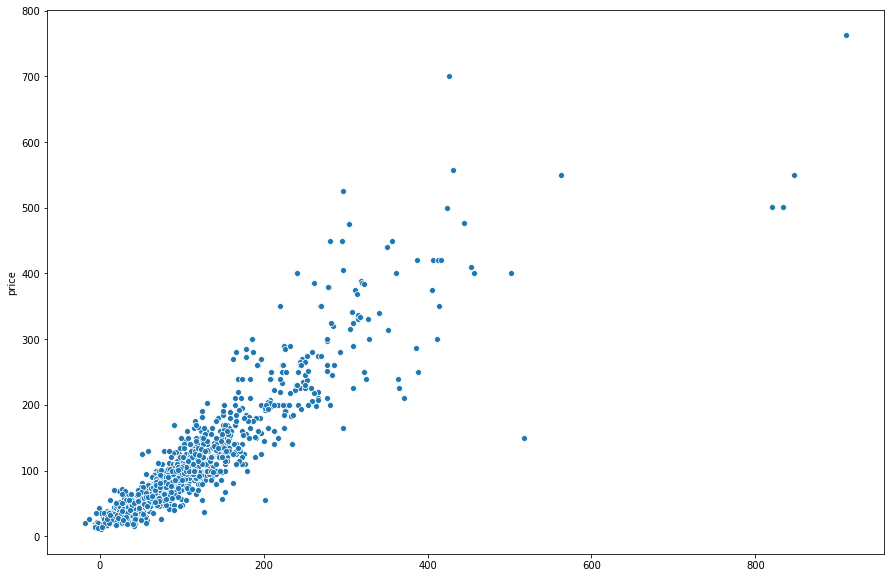

In [67]:
sns.scatterplot(y_pred,y_test)

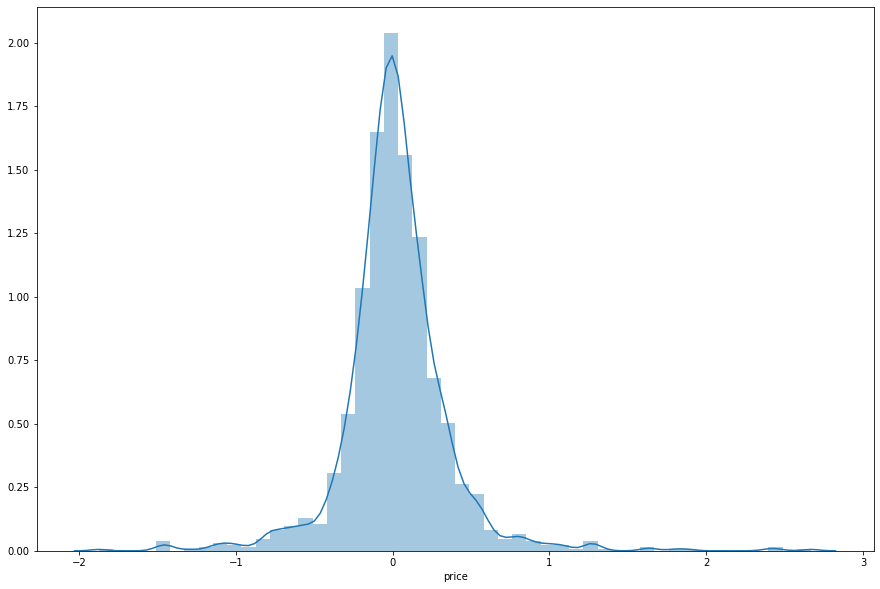

In [75]:
sns.distplot((y_pred-y_test)/y_test)

## Export the model

In [108]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

- Export location and column information to a file that will be useful later on in our prediction application

In [110]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))